In [2]:
from google.colab import files
uploaded = files.upload()

Saving DATA - Copy.xlsx to DATA - Copy.xlsx


In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as smf
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_excel('DATA - Copy.xlsx')

In [5]:
df.head()

,Timestamp,RCM,CWT,M10HP3,M11HP3,M12HP7,M13HP19,FWB,OC,BBCM,allplant
0,2021-09-12 09:00:00,13.305438,126.273682,6.803682,6.868354,16.019477,42.661403,18.470824,60.590962,2.978935,361.951692
1,2021-09-12 09:00:10,13.354751,121.904403,6.726379,6.687034,15.164154,42.081863,17.694007,58.992305,3.053611,353.712117
2,2021-09-12 09:00:20,13.353976,123.487910,6.739964,6.614491,15.442375,42.773934,17.899802,59.263802,2.931991,356.440237
3,2021-09-12 09:00:30,13.256474,123.681021,6.573097,6.516097,15.508268,41.199400,17.692619,59.710259,3.015877,355.168988
4,2021-09-12 09:00:40,13.289154,126.183061,6.733114,6.565825,15.192305,43.287892,17.596936,60.894429,2.952798,360.648314


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  18000 non-null  datetime64[ns]
 1   RCM        18000 non-null  float64       
 2   CWT        18000 non-null  float64       
 3   M10HP3     18000 non-null  float64       
 4   M11HP3     18000 non-null  float64       
 5   M12HP7     18000 non-null  float64       
 6   M13HP19    18000 non-null  float64       
 7   FWB        18000 non-null  float64       
 8   OC         18000 non-null  float64       
 9   BBCM       18000 non-null  float64       
 10  allplant   18000 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 1.5 MB


In [7]:
df.isnull().sum()

Timestamp    0
RCM          0
CWT          0
M10HP3       0
M11HP3       0
M12HP7       0
M13HP19      0
FWB          0
OC           0
BBCM         0
allplant     0
dtype: int64

In [8]:
df.shape

(18000, 11)

In [9]:
df  = df.drop(['Timestamp'],axis=1)

In [10]:
df.shape

(18000, 10)

In [11]:
df.describe()

,RCM,CWT,M10HP3,M11HP3,M12HP7,M13HP19,FWB,OC,BBCM,allplant
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,13.250044,124.873599,6.680506,6.680754,15.591082,42.359144,17.930070,59.792176,2.986639,358.155773
std,0.097781,2.012735,0.119944,0.120559,0.296429,0.780258,0.329756,1.110722,0.055695,2.895859
min,12.922501,120.879820,6.472229,6.472270,15.083362,41.000263,17.361140,57.861327,2.888889,320.278432
25%,13.182991,123.146966,6.576989,6.575960,15.337038,41.680041,17.645081,58.836799,2.938995,356.324211
50%,13.250052,124.895405,6.679588,6.679239,15.588378,42.364037,17.926620,59.788066,2.986804,358.135840
75%,13.317412,126.608228,6.784864,6.786241,15.843565,43.030151,18.215886,60.751309,3.034004,359.944935
max,13.566364,128.836236,6.888863,6.888870,16.110874,43.722219,18.499997,61.721935,3.083322,457.464050


In [12]:
# converting continous data into categorical dataset using binning
categorical=pd.cut(df.allplant,bins=[250,358,462],labels=['low','high'])

In [13]:
categorical.value_counts()

high    9341
low     8659
Name: allplant, dtype: int64

In [14]:
categorical.head()

0    high
1     low
2     low
3     low
4    high
Name: allplant, dtype: category
Categories (2, object): ['low' < 'high']

In [15]:
df.insert(10,'energy_consumption',categorical)

In [16]:
df.head()

,RCM,CWT,M10HP3,M11HP3,M12HP7,M13HP19,FWB,OC,BBCM,allplant,energy_consumption
0,13.305438,126.273682,6.803682,6.868354,16.019477,42.661403,18.470824,60.590962,2.978935,361.951692,high
1,13.354751,121.904403,6.726379,6.687034,15.164154,42.081863,17.694007,58.992305,3.053611,353.712117,low
2,13.353976,123.487910,6.739964,6.614491,15.442375,42.773934,17.899802,59.263802,2.931991,356.440237,low
3,13.256474,123.681021,6.573097,6.516097,15.508268,41.199400,17.692619,59.710259,3.015877,355.168988,low
4,13.289154,126.183061,6.733114,6.565825,15.192305,43.287892,17.596936,60.894429,2.952798,360.648314,high


In [17]:
df  = df.drop(['allplant'],axis=1)

In [18]:
colnames = list(df.columns)
colnames

['RCM',
 'CWT',
 'M10HP3',
 'M11HP3',
 'M12HP7',
 'M13HP19',
 'FWB',
 'OC',
 'BBCM',
 'energy_consumption']

In [19]:
# taking predictors and target
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=9)

In [24]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [25]:
y_pred = model.predict(X_test)

In [26]:
y_pred

array(['low', 'low', 'high', ..., 'high', 'high', 'high'], dtype=object)

In [30]:
y_pred_train = model.predict(X_train)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
round(accuracy_score(y_test,y_pred),2)

0.93

In [33]:
round(accuracy_score(y_train,y_pred_train),2)

0.98

In [34]:
from sklearn.metrics import confusion_matrix
con_m = confusion_matrix(y_test,y_pred)

In [35]:
from mlxtend.plotting import plot_decision_regions,plot_confusion_matrix

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f892d450f90>)

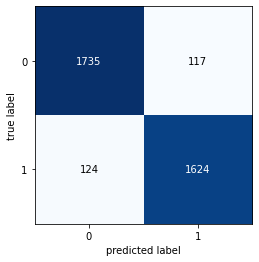

In [36]:
plot_confusion_matrix(confusion_matrix(y_test,y_pred))

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.93      0.94      0.94      1852
         low       0.93      0.93      0.93      1748

    accuracy                           0.93      3600
   macro avg       0.93      0.93      0.93      3600
weighted avg       0.93      0.93      0.93      3600



In [38]:
TP = con_m[0,0]
TN = con_m[1,1]
FP = con_m[0,1]
FN = con_m[1,0]

In [39]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9331


In [40]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0669


In [41]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9368


In [42]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9333


In [44]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.92777778 0.92916667 0.92673611 0.94027778 0.93333333]


In [48]:
scores.mean()

0.9314583333333333

In [49]:
# saving the model
# importing pickle
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [50]:
# load the model from disk
model = pickle.load(open('model.pkl', 'rb'))